## Unit 5 | Assignment - The Power of Plots

## Background

## Option 1: Pyber

![Ride](../Images/Ride.png)

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
file1 = ('raw_data/city_data.csv')

pyber_df1 = pd.read_csv(file1)

pyber_df1.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [81]:
#Get rid off duplicate cities
pyber_df1 = pyber_df1.groupby('city').agg({'driver_count': sum, 'type':'first' }).reset_index()
pyber_df1.head()


,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [82]:
file2 = ('raw_data/ride_data.csv')
pyber_df2 = pd.read_csv(file2)

pyber_df2.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [83]:
pyber_df = pd.merge(pyber_df1,pyber_df2 ,on='city')

In [84]:
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
2,Alvarezhaven,21,Urban,2016-09-01 22:57:12,18.09,1197329964911
3,Alvarezhaven,21,Urban,2016-08-18 07:12:06,20.74,357421158941
4,Alvarezhaven,21,Urban,2016-04-04 23:45:50,14.25,6431434271355


In [85]:

pyber_df = pyber_df[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Alvarezhaven,2016-04-18 20:51:29,31.93,4267015736324,21,Urban
1,Alvarezhaven,2016-08-01 00:39:48,6.42,8394540350728,21,Urban
2,Alvarezhaven,2016-09-01 22:57:12,18.09,1197329964911,21,Urban
3,Alvarezhaven,2016-08-18 07:12:06,20.74,357421158941,21,Urban
4,Alvarezhaven,2016-04-04 23:45:50,14.25,6431434271355,21,Urban


In [86]:
pyber_df_count = pyber_df[['city',  'driver_count', 'type', 'fare']].groupby(['city', 'driver_count', 'type']).agg(['count','mean'])
pyber_df_count.columns = ['total_number_of_rides', 'average_fare']
pyber_df_count['average_fare'] = pyber_df_count['average_fare'].map("{:.2f}".format)
pyber_df_count.reset_index().head()

,city,driver_count,type,total_number_of_rides,average_fare
0,Alvarezhaven,21,Urban,31,23.93
1,Alyssaberg,67,Urban,26,20.61
2,Anitamouth,16,Suburban,9,37.32
3,Antoniomouth,21,Urban,22,23.62
4,Aprilchester,49,Urban,19,21.98


In [87]:
pyber_df_count = pyber_df_count.reset_index()

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [88]:
city_types = pyber_df['type'].unique()
city_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [89]:
x_axis = pd.to_numeric(pyber_df_count['total_number_of_rides'])
y_axis = pd.to_numeric(pyber_df_count['average_fare'])
s_value = pd.to_numeric(pyber_df_count['driver_count'])*5 
colors={'Urban':'gold', 'Suburban':'lightskyblue', 'Rural':'lightcoral'}
colors1 = pyber_df_count['type'].apply(lambda x: colors[x]).values

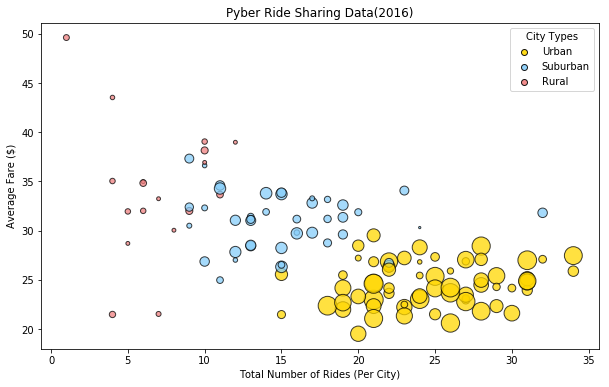

In [90]:
lgnd = plt.scatter(x_axis, y_axis, s=s_value, facecolor=colors1, edgecolors='black',alpha=0.75,label='')
plt.title('Pyber Ride Sharing Data(2016)')
fig_size = plt.rcParams["figure.figsize"] = [10,6]
fig_size[0] = 10
fig_size[1] = 6
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
#plt.rcParams['figure.figsize'] = fig_size
gold_patch = plt.scatter([],[], marker="o", alpha=0.9,facecolor='gold', edgecolors='black', label='Urban')
blue_patch = plt.scatter([],[], marker="o", alpha=0.9,facecolor='lightskyblue',edgecolors='black',label='Suburban')
coral_patch = plt.scatter([],[], marker="o", alpha=0.9,facecolor='lightcoral', edgecolors='black',label='Rural')
plt.legend(handles=[gold_patch,blue_patch,coral_patch],title="City Types")
plt.show()   
    

## % of Total Fares by City Type

In [91]:

total_fares_by_citytype = pyber_df[['fare', 'type']].groupby(['type']).sum()
percentage_total_fares_by_citytype = round((total_fares_by_citytype['fare']/pyber_df['fare'].sum())*100, 2)
total_fares_by_citytype
percentage_total_fares_by_citytype


type
Rural        6.68
Suburban    30.35
Urban       62.97
Name: fare, dtype: float64

In [92]:
# Labels for the sections of our pie chart
labels = ['Rural', 'Suburban', 'Urban']

# The values of each section of the pie chart
persentage = percentage_total_fares_by_citytype.values

persentage
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue" ,"lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0)


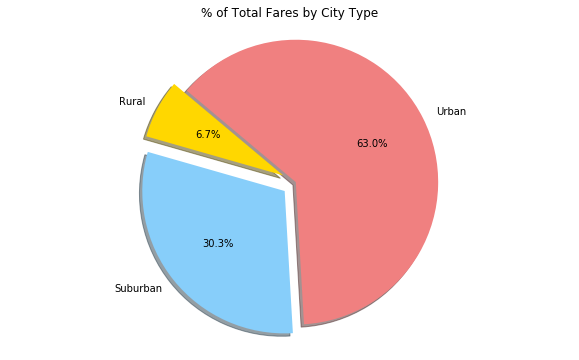

In [93]:
plt.pie(persentage, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')
plt.axis("equal")
plt.show()


## % of Total Rides by City Type

In [94]:
#total_rides_by_citytype = pyber_df[['type', 'fare']].groupby(['type']).count()
total_rides_by_citytype = pyber_df[['type', 'ride_id']].groupby(['type']).count()
total_rides_by_citytype

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [95]:
total_rides_by_citytype.columns = ['total rides by city type']

In [96]:
percentage_of_total_rides_by_citytype = round(total_rides_by_citytype['total rides by city type']/pyber_df['fare'].count()*100, 2)
percentage_of_total_rides_by_citytype    

type
Rural        5.26
Suburban    26.32
Urban       68.42
Name: total rides by city type, dtype: float64

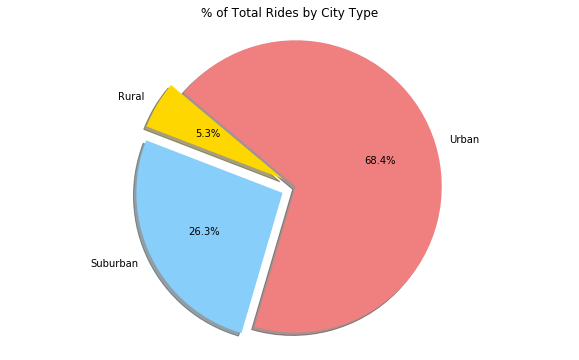

In [97]:

# Labels for the sections of our pie chart
labels = ['Rural', 'Suburban', 'Urban']

# The values of each section of the pie chart
persentage = percentage_of_total_rides_by_citytype.values

persentage
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue" ,"lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0)

plt.pie(persentage, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')
plt.axis("equal")
plt.show()

## % of Total Drivers by City Type

In [98]:

total_drivers_by_citytype = pyber_df_count[['driver_count', 'type']].groupby(['type']).sum()
print(total_drivers_by_citytype)

percentage_total_drivers_by_citytype = round(total_drivers_by_citytype['driver_count']/pyber_df_count['driver_count'].sum()*100, 2)

          driver_count
type                  
Rural              104
Suburban           638
Urban             2607


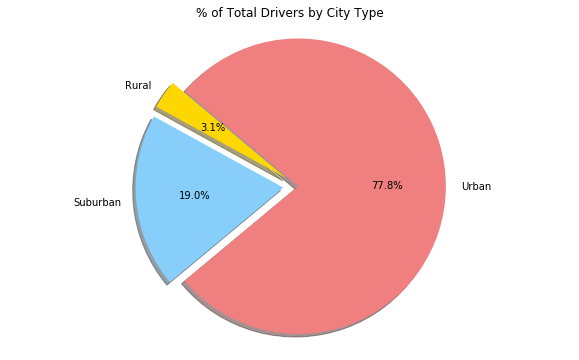

In [99]:
# Labels for the sections of our pie chart
labels = ['Rural', 'Suburban', 'Urban']

# The values of each section of the pie chart
persentage = percentage_total_drivers_by_citytype.values

persentage
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue" ,"lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0)

plt.pie(persentage, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type')
plt.axis("equal")
plt.show()

* You must include a written description of three observable trends based on the data.

1.Total number of drivers in urban area is majority (77.8%)
2.Total rides in urban area is also high (68.4%)
3.Correspondingly totalfares in this type also very high